Fitting 3 folds for each of 100 candidates, totalling 300 fits
Melhores hiperparâmetros: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 30}

Desempenho do modelo Random Forest:
Acurácia: 0.6666666666666666

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.83      0.50      0.40         3
weighted avg       0.78      0.67      0.53         3



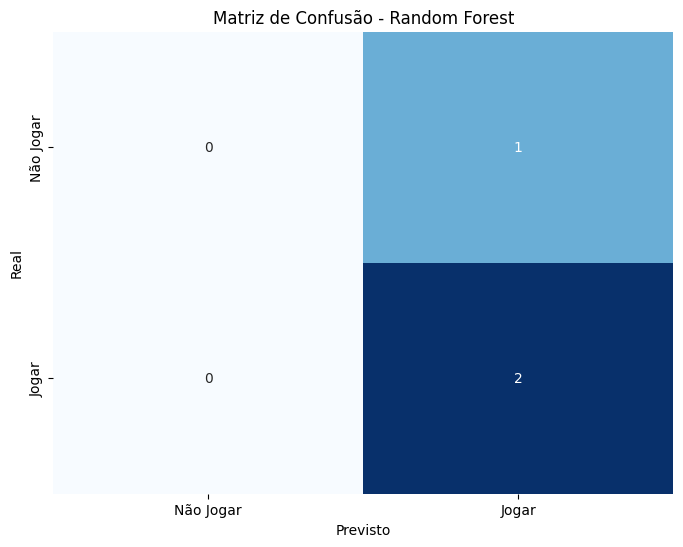

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
data = pd.read_csv('jogar_ou_nao_jogar.csv')

# Codificar as características categóricas em números
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

# Separar os dados em atributos e rótulos
X = data.drop('Jogar', axis=1)
y = data['Jogar']

# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os hiperparâmetros para ajustar
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Inicializar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Realizar a busca aleatória de hiperparâmetros
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Treinar o modelo com a busca aleatória de hiperparâmetros
rf_random.fit(X_treino, y_treino)

# Melhor combinação de hiperparâmetros encontrada
print("Melhores hiperparâmetros:", rf_random.best_params_)

# Fazer previsões com o modelo ajustado
previsoes_rf = rf_random.predict(X_teste)

# Avaliar o desempenho do modelo Random Forest
print("\nDesempenho do modelo Random Forest:")
print("Acurácia:", accuracy_score(y_teste, previsoes_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes_rf, zero_division=1))

# Calcular a matriz de confusão
conf_matrix_rf = confusion_matrix(y_teste, previsoes_rf)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Não Jogar', 'Jogar'], yticklabels=['Não Jogar', 'Jogar'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()
